## Introduction to Probability and Statistics
## Assignment

In this assignment, we will use the dataset of diabetes patients taken [from here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../../data/diabetes.tsv",sep='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135



In this dataset, columns as the following:
* Age and sex are self-explanatory
* BMI is body mass index
* BP is average blood pressure
* S1 through S6 are different blood measurements
* Y is the qualitative measure of disease progression over one year

Let's study this dataset using methods of probability and statistics.

### Task 1: Compute mean values and variance for all values

In [46]:
df_stats = pd.DataFrame()
df_stats['mean'] = df.mean()
df_stats['variance'] = df.var()
df_stats.head(11).T

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
mean,48.51810,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
variance,171.84661,0.249561,19.519798,191.304401,1197.717241,924.955494,167.293585,1.665261,0.272892,132.165712,5943.331348


### Task 2: Plot boxplots for BMI, BP and Y depending on gender

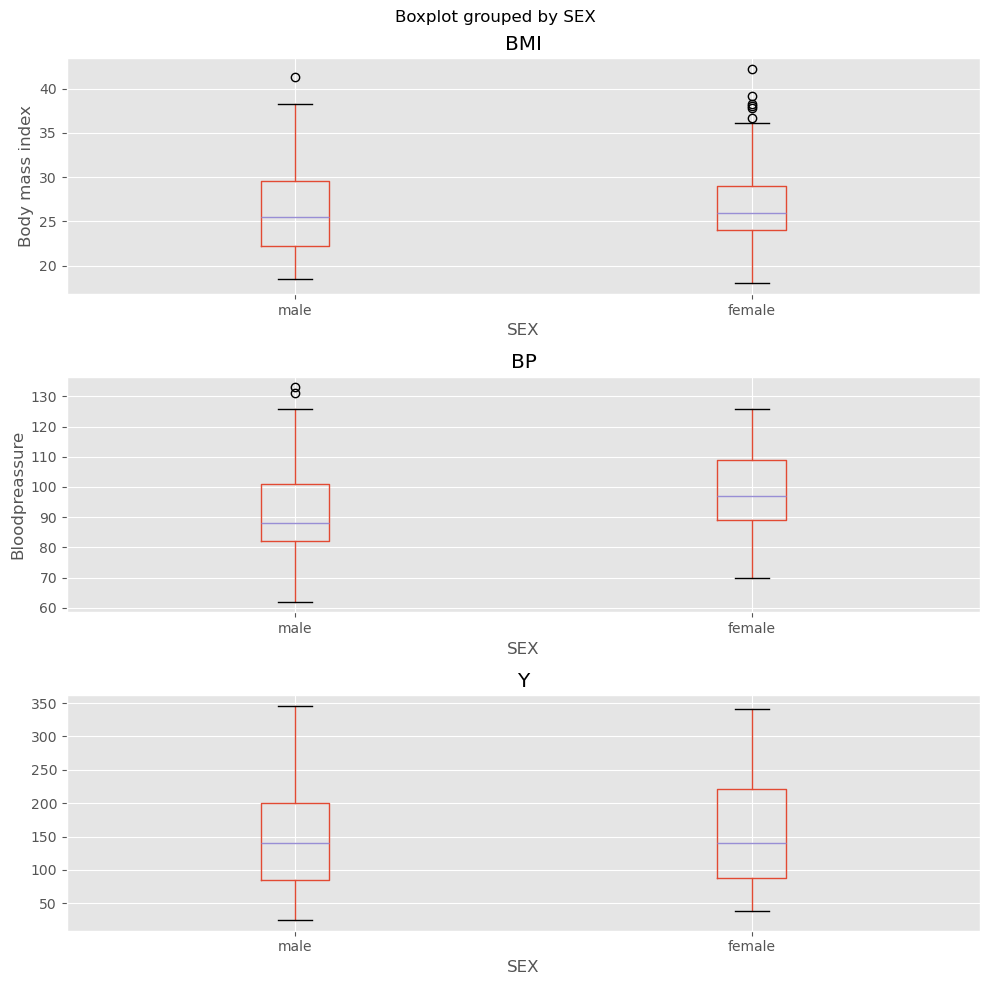

In [61]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, ax = plt.subplots(nrows=3, figsize=(10,10))
df.boxplot(column='BMI', by='SEX', ax=ax[0])
df.boxplot(column='BP', by='SEX', ax=ax[1])
df.boxplot(column='Y', by='SEX', ax=ax[2])
ax[0].set_xticklabels(['male', 'female'])
ax[0].set_ylabel('Body mass index')
ax[1].set_xticklabels(['male', 'female'])
ax[1].set_ylabel('Bloodpreassure')
ax[2].set_xticklabels(['male', 'female'])
plt.tight_layout()
plt.show()


### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

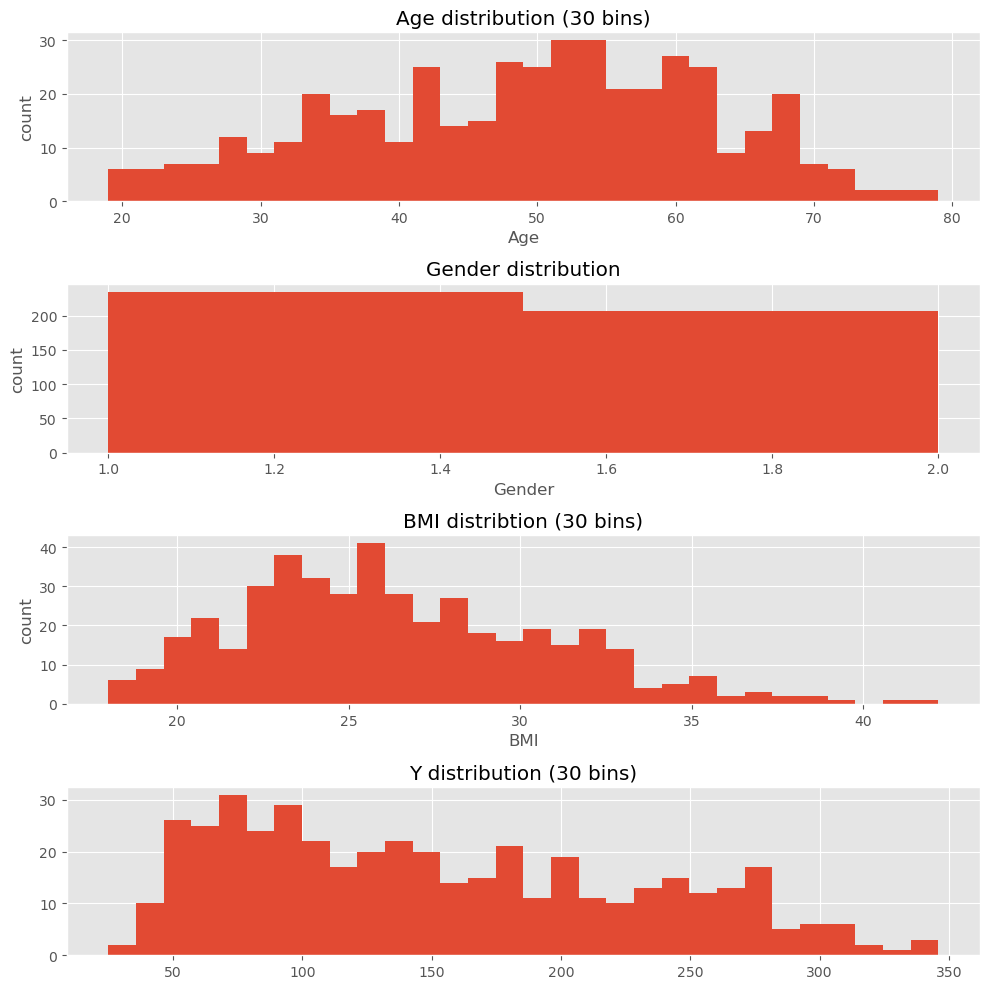

In [62]:
plt.style.use('ggplot')
fig, ax = plt.subplots(nrows = 4, ncols=1, figsize=(10, 10))
df['AGE'].hist(bins = 30, ax=ax[0])
ax[0].set_title('Age distribution (30 bins)')
ax[0].set_ylabel('count')
ax[0].set_xlabel('Age')
df['SEX'].hist(ax=ax[1], bins=2)
ax[1].set_title('Gender distribution')
ax[1].set_ylabel('count')
ax[1].set_xlabel('Gender')
df['BMI'].hist(bins = 30, ax=ax[2])
ax[2].set_title('BMI distribtion (30 bins)')
ax[2].set_ylabel('count')
ax[2].set_xlabel('BMI')
df['Y'].hist(bins = 30, ax=ax[3])
ax[3].set_title('Y distribution (30 bins)')
plt.tight_layout()

### Task 4: Test the correlation between different variables and disease progression (Y)

> **Hint** Correlation matrix would give you the most useful information on which values are dependent.

In [63]:
bmi_y_corr = np.corrcoef(df['BMI'], df['Y'])
print(f'Correlation BMI <-> Y\n{bmi_y_corr}\n=> {bmi_y_corr[0,1]}\n')

age_y_corr = np.corrcoef(df['AGE'], df['Y'])
print(f'Correlation Age <-> Y\n{age_y_corr}\n=> {age_y_corr[0,1]}\n')

gender_y_corr = np.corrcoef(df['SEX'], df['Y'])
print(f'Correlation Gender <-> Y\n{gender_y_corr}\n=> {gender_y_corr[0,1]}\n')

Correlation BMI <-> Y
[[1.         0.58645013]
 [0.58645013 1.        ]]
=> 0.5864501344746885

Correlation Age <-> Y
[[1.         0.18788875]
 [0.18788875 1.        ]]
=> 0.18788875071891978

Correlation Gender <-> Y
[[1.       0.043062]
 [0.043062 1.      ]]
=> 0.043061998451605334



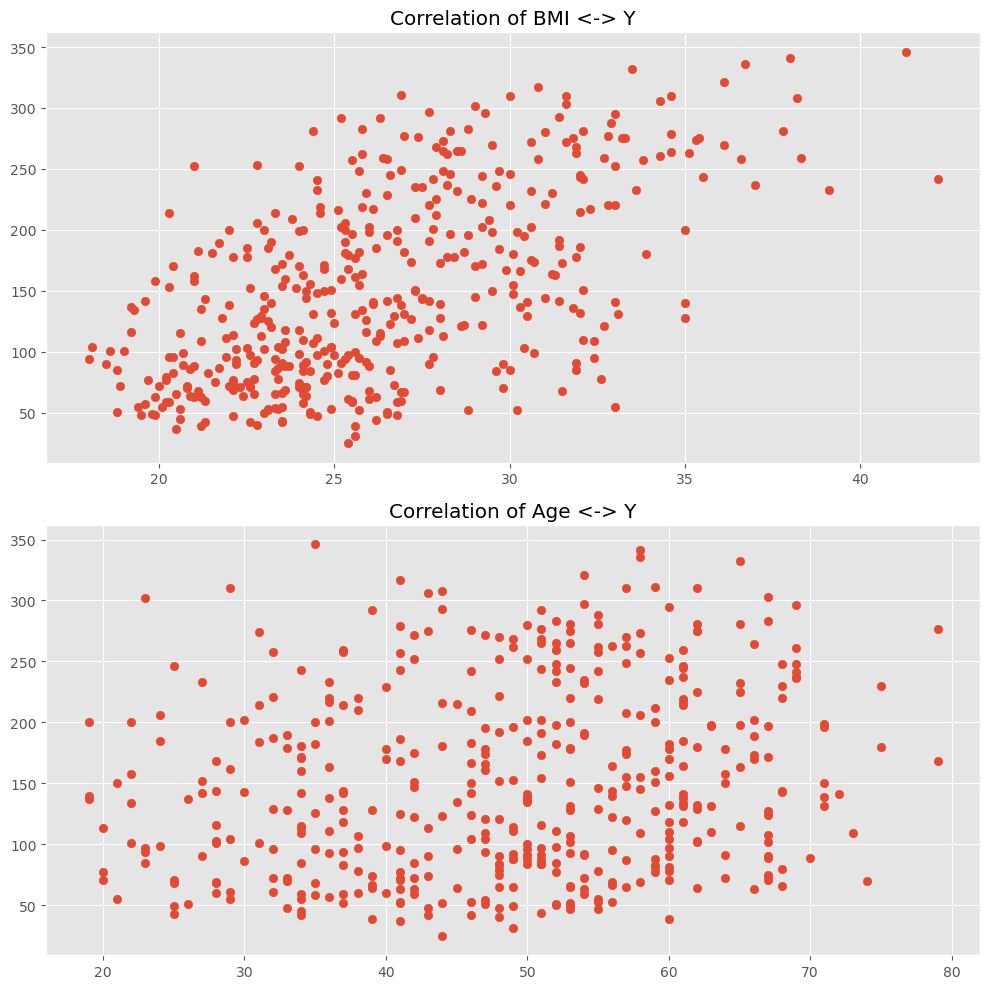

In [72]:
plt.style.use('ggplot')
fig, ax = plt.subplots(nrows = 2, ncols=1, figsize=(10, 10))
ax[0].scatter(df['BMI'], df['Y'])
ax[0].set_title('Correlation of BMI <-> Y')
ax[1].scatter(df['AGE'], df['Y'])
ax[1].set_title('Correlation of Age <-> Y')
plt.tight_layout()

### Task 5: Test the hypothesis that the degree of diabetes progression is different between men and women

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [79]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['SEX']==1,['Y']], df.loc[df['SEX']==2,['Y']], equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = -0.90
P-value: 0.3674449793083975
